# Отчёт по НИР

## Статически оптимальное дерево отрезков

Артем Комендантян, 4 курс МФТИ, кафедра анализа данных

**Научный руководитель:** Михаил Тихомиров, к.ф.-м.н.

# Введение

Дерево отрезков - это мощная структура данных, которая позволяет решать многие задачи. Например такие как нахождение наименьшего общего предка двух вершин в дереве и нахождение площади объединения прямоугольников со сторонами, параллельными осям координат.

Результаты, полученные в этом дипломе, потенциально могут привести к ускорению на реальных задачах.

Также стоит заметить, что аналогичная задача для некоторых других структур данных хорошо изучена.

# Определения

Пусть дан массив из n элементов

**Дерево отрезков** - это двоичное дерево, в котором есть
  * $n$ листьев, соответствующих отрезкам единичной длины
  * Вершины с двумя сыновьями. Правый сын соответствует отрезку,
    следующему сразу за отрезком левого сына. Вершина соответствует
    объединению отрезков сыновей

Корень дерева соответствует всему массиву (отрезку $[1; n]$)

**Запрос сверху** на отрезке $[L, R]$ начинается в корне.

Если сейчас рассматривается вершина, отрезок которой не лежит полностью в
отрезке $[L, R]$, то запрос рекурсивно вызывается от тех сыновей, отрезки которых
пересекаются с $[L, R]$. Иначе рекурсивных вызовов от сыновей не происходит.

В обоих случаях вершина считается посещенной и в ней выполняются какие-то
действия, специфичные для запроса.

### Пример

Дерево отрезков на пяти элементах. Запрос на отрезке $[2; 4]$.

Будет посещено пять выделенных вершин.

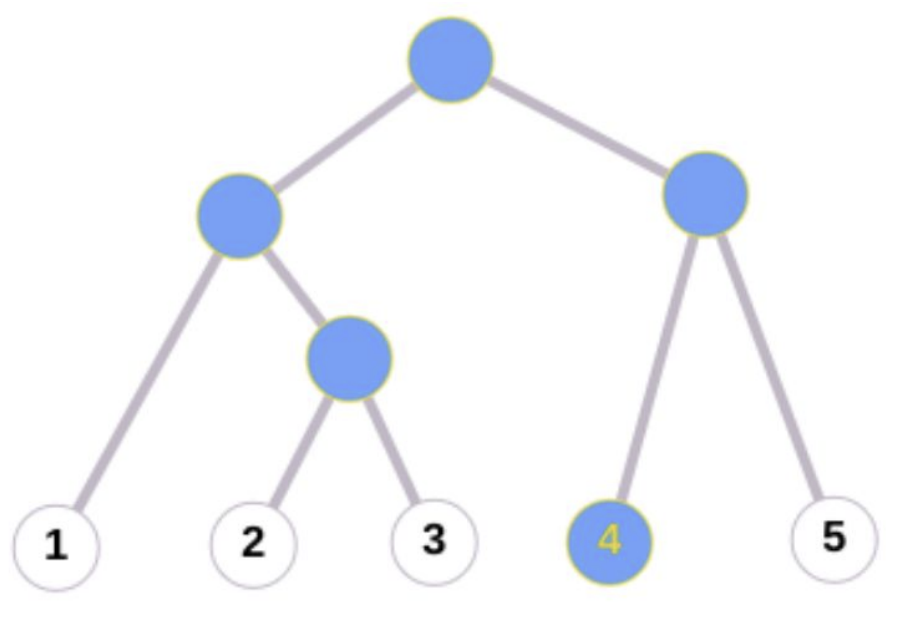

# Постановка задачи

**Дано:** Распределение вероятностей на запросах-отрезках с границами из $[1; n]$

**Необходимо:** построить дерево отрезков, для которого минимально среднее
количество посещенных вершин при запросах сверху.

Интересует как точное решение за как можно более лучшую асимптотику, так и
приближенное за сложность нахождения $O(n + S)$ или $O(n + S \log S)$, где $S$ -
количество отрезков с ненулевой вероятностью

# Обзор литературы

# Решение задачи

## Точное решение за $O(n^3 + S)$ времени и $O(n^2)$ памяти

Пусть вес запроса - это то же самое, что и его вероятность.

Пусть вес дерева отрезков - это сумма по всем данным запросам произведения их веса на количество посещенных вершин в дереве отрезков.

Введём понятие дерева отрезков, построенного на $[L, R]$ и его веса.
Корень такого дерева отрезков соответствует отрезку $[L, R]$. Запросы, не пересекающиеся с $[L, R]$ убираются из рассмотрения, а для остальных берется их пересечение с отрезком $[L, R]$.

Дальше несколько фактов:

  * Для отрезка $[L, R]$ к весу дерева отрезков прибавляется сумма весов запросов, которые пересекаются с $[L, R]$
  * Если сыновьям корня соответствуют отрезки $[L, m]$ и $[m + 1, R]$, то в весе дерева отрезков на $[L, R]$ надо
    учесть вес дерева отрезков на $[L, m]$ и на $[m + 1, R]$.
  * При этом запросы целиком содержащие $[L, R]$ не посещают никаких вершин кроме корня, поэтому их нужно
    вычесть из весов деревьев отрезков на $[L, m]$ и на $[m + 1, R]$.
    
Введем несколько обозначений

  * $exact_{L, R}$ - суммарный вес запросов с границами $[L, R]$
  * $include_{L, R}$ - суммарный вес запросов, которые содержат отрезок $[L, R]$
  * $intersect_{L, R}$ - суммарный вес запросов, которые пересекаются с отрезком $[L, R]$
  * $dp_{L, R}$ - минимальный вес дерева отрезков, построенного на $[L, R]$.

Тогда из предыдущих фактов следует, что верно

  * $dp_{L, L} = intersect_{L, L}$
  * $L \ne R \Rightarrow dp_{L, R} = intersect_{L, R} - 2 \cdot include_{L, R} +
    \min \limits_{L \le m < R} {dp_{L, m} + dp_{m + 1, R}}$

$dp_{L, R}$ зависит только от меньших по длине отрезков, поэтому можно найти минимальный вес всего дерева отрезков, считая $dp_{L, R}$ по возрастанию длины отрезков.

Если запоминать для каждого отрезка какой $m$ дало минимальную сумму значений у сыновей, то можно и восстановить само дерево.

Без подсчёта $intersect_{L, R}$ и $include_{L, R}$ это решение будет работать за $O(n^3)$ времени и $O(n^2)$ памяти.

Самый простой способ подсчёта этих значений - перебор для каждого отрезка всех запросов. Это работает за $O(n^2 S)$, что при $S = O(n^2)$ превращается в $O(n^4)$. Приведем теперь способ их подсчёта за $O(n^2 + S)$.

  * $include_{1, n} = exact_{1, n}$
  * $R \ne n \Rightarrow include_{1, R} = include_{1, R + 1} + exact_{1, R}$
  * $L \ne 1 \Rightarrow include_{L, n} = include_{L - 1, n} + exact_{L, n}$
  * $L \ne 1 \land R \ne n \Rightarrow include_{L, R} = exact_{L, R} +
    include_{L - 1, R} + include_{L, R + 1} - include_{L - 1, R + 1}$

В первых трёх пунктах просто суммируются веса всех запросов, которые содержат соответствующий отрезок.
В последнем пункте любой запрос, содержащий $[L, R]$ либо совпадает с этим отрезком, либо содержит отрезок с длиной увеличенной на 1. При этом два раза считаются отрезки, содержащие $[L - 1, R + 1]$, их надо вычесть.

Здесь любой $include_{L, R}$ зависит только от $exact_{L, R}$ (подсчитывается тривиально за $O(n^2 + S)$), либо от $include$ с большей длиной отрезка. Так что, считая по убыванию длины отрезка можно найти $include_{L, R}$ за $O(n^2 + S)$

  * $intersect_{L, L} = include_{L, L}$
  * $L \ne R \Rightarrow intersect_{L, R} = include_{L, L} + intersect_{L + 1, R} - include_{L, L + 1}$
  
Пересечение с отрезком длины 1 - это тоже самое, что его содержание внутри себя.
Если запрос пересекается с $[L, R]$, то он либо содержит внутри себя $[L, L]$, либо пересекается с $[L + 1, R]$. При этом два раза учитываются отрезки, содержащие $[L, L + 1]$, поэтому их надо вычесть.
Если перебирать отрезки по возрастанию длины, то $intersect_{L, R}$ можно подсчитать за $O(n^2)$.

В итоге получается точное решение за $O(n^3 + S)$ времени и $O(n^2)$ памяти.

### Дальнейшие идеи для более оптимального точного решения

Так как для нахождения оптимального дерева поиска есть оптимизация решения за куб до $O(n^2)$, то хочется найти решение быстрее чем за $O(n^3 + S)$ и для моей задачи. В [3] было доказано, что точно можно оптимизировать до $O(n^2)$, если 

  * $dp_{L, L} = cost_{L, L}$
  * $dp_{L, R} = cost_{L, R} + \min \limits_{L \le m < R} {dp_{L, m} + dp_{m + 1, R}}$
  * $\forall a \le b \le c \le d:\ cost_{a, d} \ge cost_{b, c}$ (монотонность)
  * $\forall a \le b \le c \le d:\ cost_{a, с} + cost_{b, d} \le cost_{a, d} + cost_{b, c}$ (quadrangle неравенство)
  
Если в точном решении для нашей задачи заменить $cost_{L, L}$ c $intersect_{L, L}$ до $intersect_{L, L} - 2 \cdot include_{L, L}$, то оптимальное решение не поменяется (сумма $cost_{L, L}$ в листьях учитывается одинаково для любого решения), но при этом можно доказать, что выполняются следующие свойства:

  * $\forall a \le b \le c \le d:\ cost_{a, d} \ge cost_{b, c}$
  * $\forall a \le b \le c \le d:\ cost_{a, с} + cost_{b, d} \ge cost_{a, d} + cost_{b, c}$
 
Я пока что не выяснил, можно ли что-то получить из комбинации этих двух свойств.

Еще довольно много вариантов оптимизаций с ссылками на научные статьи есть в https://codeforces.com/blog/entry/8219, но актуальных для моей задачи я не нашёл.

## Асимптотически оптимальное приближенное решение

Сейчас у нас запросы на отрезках и при подсчете их веса берется количество посещенных вершин. Давайте решать похожую задачу. Заменим запрос $[L, R]$ на два запроса $[1, R]$ и $[L, n]$ с весами, равными весу исходного запроса

Будем в такой задаче считать весом дерева отрезков сумму по всем новым запросам веса запроса умножить на максимальную глубину посещенной им вершины.
Здесь глубину корня считаем равной единице, а глубина любой другой вершины выражается как глубина её непосредственного предка плюс один.

Давайте смотреть, как соотносится количество посещенных вершин исходного запроса $[L, R]$ и сумма глубин двух новых запросов $[1, R]$ и $[L, n]$.

**TODO:** доказать, что отличаются не более чем в четыре раза

**Утверждение:** Самая глубокая вершина, которую посещает запрос $[1, R]$ соответствует отрезку $[x, R]$ для некоторого $x$, причём если таких вершин несколько, то соответствует наименее глубокой из них.

**Доказательство:**

Посмотрим, какие вершины запрос посещает, начиная с корня. Если сейчас он находится в вершине, соответствующей отрезку $[x, R]$, то дальше он не спускается. Пусть иначе правый сын не посещается, тогда запрос спускается в левого сына. Если правый сын посещается, то посещается и левый, но отрезок левого сына обязан лежать целиком в $[1, R]$, поэтому дальше левого сына спуск не идёт, и запрос спускается в правого сына.

В итоге, запрос приходит только в наименее глубокую вершину с правой границей $R$. Так как на каждом шаге либо запрос посещает одного сына, либо спускается в другого сына максимум на одну вершину, то более глубоких вершин запрос не посетит.

**Утверждение:** Самая глубокая вершина, которую посещает запрос $[L, n]$ соответствует отрезку $[L, x]$ для некоторого $x$, причём если таких вершин несколько, то соответствует наименее глубокой из них.

**Доказательство:** Симметрично предыдущему.

Если мы можем определить, как выбирать самую глубокую вершину, то можно так же и определить, как выбирать путь до этой вершины (не включающий эту вершину).

Пусть в дереве отрезков есть вершина $v_{[L, R]}$, соответствующая отрезку $[L, R]$. Скажем, что стоимость отрезка $[L, R]$ - это сумма по всем новым запросам их веса помножить на количество вершин из пути до самой глубокой вершины, которые лежат в поддереве $v_{[L, R]}$. Тогда $dp_{L, R}$ - это минимальная стоимость отрезка $[L, R]$ среди всех возможных разбиений этого отрезка на поддерево.

Введём вспомогательные величины

  * $lw_i$ - сумма весов всех запросов $[i, n]$
  * $rw_i$ - сумма весов всех запросов $[1, i]$

Теперь можно описать как считать $dp_{L, R}$

  * $dp_{L, L} = 0$ (так как только самая глубокая вершина может попасть в лист дерева отрезков,
    а её мы не учитываем)
  * $dp_{L, R} = \sum \limits_{i = L + 1}^R lw_i + \sum \limits_{i = L}^{R - 1} rw_i
    + \min \limits_{L \le m < R} {dp_{L, m} + dp_{m + 1, R}}$
    
Для запросов $[x, n]$, где $x$ не лежит в $[L, R]$ самая глубокая вершина просто не лежит в поддереве $v_{[L, R]}$.
Если $x = L$, то лежать в поддереве может только самая глубокая вершина, но не вершины из пути до неё. Для всех остальных запросов добраться до вершины с левой границей $x$ можно только пройдя через $v_{[L, R]}$, поэтому их веса мы прибавляем.
Аналогичны рассуждения про то, какие запросы $[1, x]$ нужно учитывать.

Введём $w_i = rw_i + I\{i > 0\} \cdot lw_{i - 1}$ для $i \in \{0,\dots,n-1\}$

Тогда $dp_{L, R} = \sum \limits_{i = L}^{R - 1} w_i + \min \limits_{L \le m < R} {dp_{L, m} + dp_{m + 1, R}}$

В чём смысл данного выражения? Все $w_i$ от $L$ до $R - 1$ учитываются в $dp_{L, R}$. После этого выбирается оптимальное $m$ такое, что все $w_i$ с $i < m$ идут влево, все с $i > m$ идут вправо, $w_m$ больше нигде не учитывается.

Но тогда $dp_{L, R}$ соответствует весу статически оптимального дерева поиска, где вероятности запроса элемента пропорциональны $w_L,\dots, w_{R-1}$, а вероятности запросов между двух элементов дерева равна нулю.

Эта задача уже хорошо изучена. Её можно решать точно за $O(n^2)$ (**TODO:** ссылка на статью Кнута) и приближенно за $O(n)$ (**TODO:** ссылка на статью)

В итоге получаем решение, которое работает за $O(n + S)$ времени. Ухудшение может вносить как первоначальное приближение, так и приближение нахождения дерева поиска. В итоге решение хуже оптимального не более в чем константу раз, где константу сверху можно оценить как $4$ умножить на константу приближения дерева поиска $\approx 4 \cdot 2.29 = 9.16$

### Дальнейшие идеи по приближенному решению

Данное решение идеально с точки зрения времени нахождения, но при этом константа кажется слишком большой для реальных применений. Тем не менее я решил написать код точного решения за $O(n^3)$ и код приближенного решения и сравнить насколько приближенное решение хуже.

Я генерировал много тестов с различными $n < 100$ и различным количеством отрезков (от меньше десятка до примерно $n^2$). Координаты отрезков и их веса я брал случайно.

В результате на всех таких тестах:

  * Решение, которое берет первоначальное приближение, а затем находим точное оптимальное дерево поиска, находит
    дерево отрезков с весом хуже не более чем в $\approx 1.42$ раз чем оптимальное
  * Решение, которое находит оптимальное дерево поиска тоже приближенно, находит
    дерево отрезков с весом хуже не более чем в $\approx 2.3$ раз чем оптимальное
    
Получается, что на практике для небольших случаев приближенное решение для дерева отрезков сравнимо по константе ухудшения с приближенным решением для дерева поиска. Если это правда и в теории, то я считаю это очень хорошим результатом.

Дальнейший план - попытаться доказать константу лучше, чем доказанная сейчас.

# Список литературы

  1. Knuth, Donald E. (1971), "Optimum binary search trees", Acta Informatica. URL: https://link.springer.com/article/10.1007%2FBF00264289
  2. Mehlhorn, Kurt (1975), "Nearly optimal binary search trees", Acta Informatica. URL: https://people.mpi-inf.mpg.de/~mehlhorn/ftp/mehlhorn3.pdf
  3. F. Frances Yao (1980), "Efficient Dynamic Programming Using Quadrangle Inequalities". URL:  https://dl.acm.org/doi/10.1145/800141.804691